In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
from matplotlib import pyplot as plt
import sys
import glob, re
import pandas as pd
import os
import natsort
import pickle 
import colorsys

from celluloid import Camera
from IPython.display import HTML

from definitions import *

# Mean Square Displacement
Plot the mean square displacement computed by LAMMPS. Look into direcory '/home/active-galton/runs/brownian/ts0.01_rt200000_s200_L50_T0.1_g1/'

## Passive

In [ ]:
msd_bd = np.loadtxt('/home/active-galton/runs/production/1c.BD/ts0.001_rt1000000_s1000_T0.1_g1_N20000/msd.dat', skiprows=2)
msd_ld = np.loadtxt('/home/active-galton/runs/production/1b.LD/ts0.001_rt1000000_s1000_T0.1_g1_N20000/msd.dat', skiprows=2)


In [ ]:
# Theoretical MSD. See Zwanzig's non-equilibrium statistical mechanics ec. 1.34

dt=0.001
m = 1
kT = 0.1
gamma = 1
t=dt*msd_ld[:,0]
theo_MSD = 2*2*kT*gamma*(t-m*gamma+m*gamma*np.exp(-t/(m*gamma)))

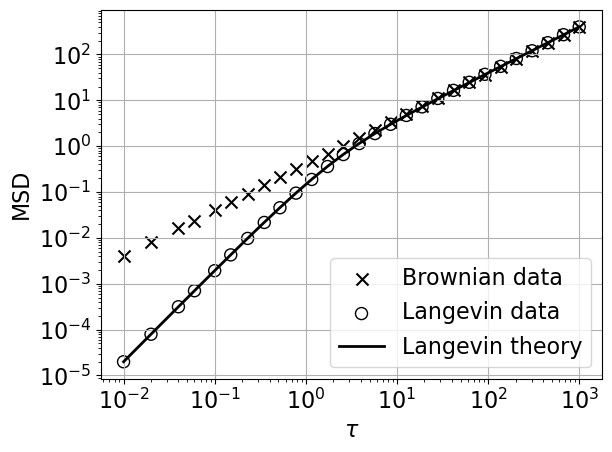

In [137]:
idxs = np.unique(np.round(np.logspace(0,5,30)-1,0).astype(np.int32))[1:]

fig2, axes2 = plt.subplots()


#axes2.plot(t,msd_bd[:,4])
#axes2.plot(t,msd_ld[:,4])
axes2.scatter(t[idxs],msd_bd[idxs,4], color='k', s=75, marker='x', label='Brownian data')
axes2.scatter(t[idxs],msd_ld[idxs,4], color='k', s=75, marker='o', facecolors='None', label='Langevin data')
axes2.plot(t[idxs], theo_MSD[idxs], 'k', lw=2, label='Langevin theory')
#axes2.plot([100000,1000000],[100000,1000000],'k--')
#axes2.plot([100,10000],[0.1,1000],'k--')
axes2.set_xscale('log')
axes2.set_yscale('log')
# axes2.set_xlim(0.00001,1000000)
# axes2.set_ylim(0.00001,1000000)
axes2.set_xlabel(r'$\tau$')
axes2.set_ylabel('MSD')
axes2.grid()
axes2.legend(loc='lower right')
fig2.set_tight_layout(True)

In [138]:
# Save plot and data
name='msd'
results_path_main="/home/active-galton/results/1.LD-BD/"
fig2.savefig(results_path_main+name+'.png')     


## ABP

In [194]:
# msd_abp = np.loadtxt('/home/active-galton/runs/production/2a.ABP/ts0.001_rt1000000_s1000_N20000_T1e-06_Tr0.03_gt1_gr3_Fp1/msd.dat', skiprows=2)
# msd_rtp = np.loadtxt('/home/active-galton/runs/production/2b.RTP/ts0.001_rt1000000_s1000_N20000_T1e-06_Tr1e-06_gt1_gr3_Fp1_tr1e-05/msd.dat', skiprows=2)
msd_abp = np.loadtxt('/home/active-galton/runs/production/2a.ABP/ts0.01_rt10000000_s2000_N20000_T1e-06_Tr0.3_gt1_gr3_Fp1/msd.dat', skiprows=2)


In [195]:
# Theoretical MSD. See Marchetti's review

dt=0.01
d=2
m = 1
kT = 0.000001
kTr = 0.3
alpha = 0.00001

gamma_t = 1
gamma_r = 3
Fp = 1

v0 = Fp/gamma_t
Dr = kTr/gamma_r
Dt = kT/gamma_t

tau_abp = 1/Dr
tau_rtp = dt/alpha

tau = tau_abp

Dac = tau*v0**2/gamma_t/d

t=dt*msd_abp[:,0]

theo_MSD_abp = 2*d*(Dt+Dac)*t + 2*(v0*tau)**2*(np.exp(-t/tau)-1)


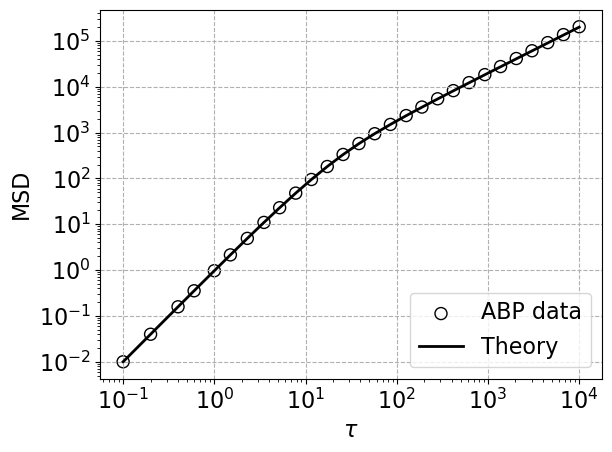

In [196]:
idxs = np.unique(np.round(np.logspace(0,5,30)-1,0).astype(np.int32))[1:]

fig2, axes2 = plt.subplots()


axes2.scatter(t[idxs],msd_abp[idxs,4], color='k', s=75, marker='o', facecolors='None', label='ABP data')
axes2.plot(t[idxs], theo_MSD_abp[idxs], 'k', lw=2, label='Theory')
axes2.set_xscale('log')
axes2.set_yscale('log')
axes2.set_xlabel(r'$\tau$')
axes2.set_ylabel('MSD')
axes2.grid(ls='--')
axes2.legend(loc='lower right')
fig2.set_tight_layout(True)

In [188]:
# Save plot and data
name='msd_abp'
results_path_main="/home/active-galton/results/2.ABP-RTP_bulk/"
fig2.savefig(results_path_main+name+'.png')

## RTP

In [197]:
msd_rtp = np.loadtxt('/home/active-galton/runs/production/2b.RTP/ts0.01_rt10000000_s10000_N20000_T1e-09_Tr1e-09_gt1_gr3_Fp1_tr0.001/msd.dat', skiprows=2)


In [198]:
# Theoretical MSD. See Marchetti's review

dt=0.01
d=2
m = 1
kT = 0.000000001
kTr = 0.000000001
alpha = 0.001

gamma_t = 1
gamma_r = 3
Fp = 1

v0 = Fp/gamma_t
Dr = kTr/gamma_r
Dt = kT/gamma_t

tau_abp = 1/Dr
tau_rtp = dt/alpha

tau = tau_rtp

Dac = tau*v0**2/gamma_t/d

t=dt*msd_rtp[:,0]

theo_MSD_rtp = 2*d*(Dt+Dac)*t + 2*(v0*tau)**2*(np.exp(-t/tau)-1)


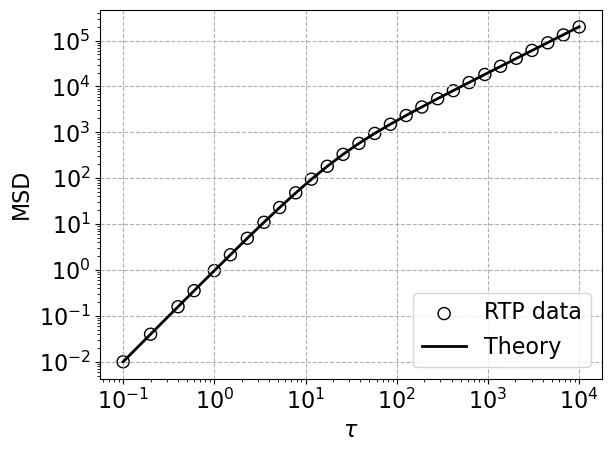

In [199]:
idxs = np.unique(np.round(np.logspace(0,5,30)-1,0).astype(np.int32))[1:]

fig2, axes2 = plt.subplots()


#axes2.plot(t,msd_bd[:,4])
#axes2.plot(t,msd_ld[:,4])
axes2.scatter(t[idxs],msd_rtp[idxs,4], color='k', s=75, marker='o', facecolors='None', label='RTP data')
# axes2.scatter(t[idxs],msd_ld[idxs,4], color='k', s=75, marker='o', facecolors='None', label='Langevin data')
axes2.plot(t[idxs], theo_MSD_rtp[idxs], 'k', lw=2, label='Theory')
axes2.set_xscale('log')
axes2.set_yscale('log')
axes2.set_xlabel(r'$\tau$')
axes2.set_ylabel('MSD')
axes2.grid(ls='--')
axes2.legend(loc='lower right')
fig2.set_tight_layout(True)

In [ ]:
# Save plot and data
name='msd_rtp'
results_path_main="/home/active-galton/results/2.ABP-RTP_bulk/"
fig2.savefig(results_path_main+name+'.png')